# 機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data_path = 'D:\\ML\\kaggle期中考\\'
df = pd.read_csv(data_path+'train_data.csv')
df_test = pd.read_csv(data_path+'test_features.csv')

In [3]:
df_test.shape

(33, 21)

In [4]:
df_sub = pd.read_csv(data_path+'sample_submission.csv')

In [5]:
df_test.shape

(33, 21)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 21 columns):
name                         33 non-null object
bonus                        21 non-null float64
deferral_payments            11 non-null float64
deferred_income              15 non-null float64
director_fees                4 non-null float64
email_address                28 non-null object
exercised_stock_options      21 non-null float64
expenses                     22 non-null float64
from_messages                21 non-null float64
from_poi_to_this_person      21 non-null float64
from_this_person_to_poi      21 non-null float64
loan_advances                2 non-null float64
long_term_incentive          17 non-null float64
other                        24 non-null float64
restricted_stock             28 non-null float64
restricted_stock_deferred    8 non-null float64
salary                       22 non-null float64
shared_receipt_with_poi      21 non-null float64
to_messages         

In [7]:
df_sub.shape

(33, 2)

In [8]:
df.shape

(113, 22)

In [9]:
train_Y = df['poi']
df_train = df.drop(['poi'],axis=1)

In [10]:
df_train.shape

(113, 21)

In [11]:
df_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [12]:
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [13]:
#透過info初步看出資料的種類，以及缺失值狀況
print('df_train_info:')
df_train.info()

df_train_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 21 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_with_poi      65 non-null float64


In [14]:
#統計所有欄位類型及數量
dtype_df = df_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,float64,19
1,object,2


In [15]:
float_features=[]
object_features=[]
for dtype, features in zip(df_train.dtypes, df_train.columns):
    if dtype == 'object':
        object_features.append(features)
    else: 
        float_features.append(features)
    
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

19 Float Features : ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

2 Object Features : ['name', 'email_address']


## T TEST

In [35]:
from scipy import stats
df_train_mn = df_train.fillna(df_train.mean())
high_pv=[]
high_t=[]
high_name=[]
name = []
alist = []
pvlist = []
for i in range(len(float_features)):
    (a,pv) = stats.ttest_ind(df_train_mn[float_features[i]][df['poi']==True],df_train_mn[float_features[i]][df['poi']==False])
    name.append(float_features[i])
    alist.append(a)
    pvlist.append(pv)
    if pv<0.05:
        high_name.append(float_features[i])
        high_t.append(a)
        high_pv.append(pv)    

In [36]:
result1 = pd.DataFrame(a,name,columns=['t'])
result1.insert(1,'pv',pvlist)
result1

,t,pv
bonus,3.178284,2.259351e-02
deferral_payments,3.178284,1.469418e-01
deferred_income,3.178284,9.859371e-02
director_fees,3.178284,1.000000e+00
exercised_stock_options,3.178284,2.764999e-08
expenses,3.178284,1.652252e-01
from_messages,3.178284,2.726790e-01
from_poi_to_this_person,3.178284,2.682439e-01
from_this_person_to_poi,3.178284,4.024474e-01
loan_advances,3.178284,2.669978e-02


In [37]:
pd.set_option('display.float_format',lambda x:'%.6f'%x)
result_t = pd.DataFrame(high_t,high_name,columns=['t'])
result_t.insert(1,'pv',high_pv)
result_t

,t,pv
bonus,2.312509,0.022594
exercised_stock_options,5.980310,0.000000
loan_advances,2.245757,0.026700
other,2.331458,0.021534
restricted_stock,2.678370,0.008522
salary,3.900921,0.000165
total_payments,2.933045,0.004078
total_stock_value,5.142889,0.000001
bonus_payment_rate,2.079148,0.039908
exercised_stock_payments,3.094549,0.002495


In [38]:
result_t.to_csv('ttest_result_mlmidterm.csv')

In [39]:
high_name

['bonus',
 'exercised_stock_options',
 'loan_advances',
 'other',
 'restricted_stock',
 'salary',
 'total_payments',
 'total_stock_value',
 'bonus_payment_rate',
 'exercised_stock_payments',
 'proportion_to_poi']

In [40]:
len(high_name)

11

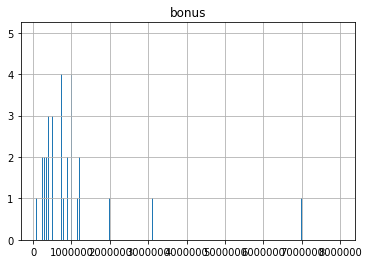

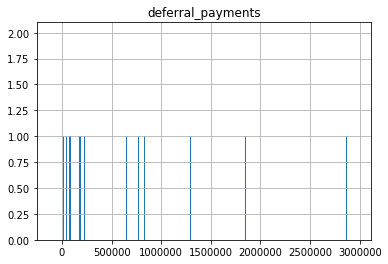

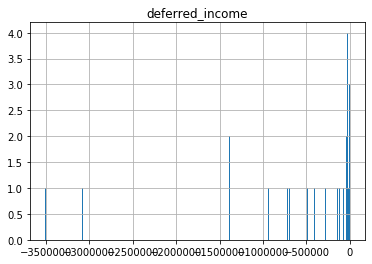

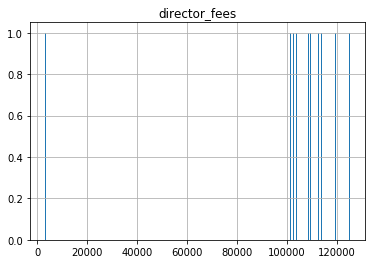

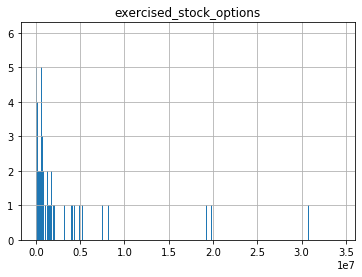

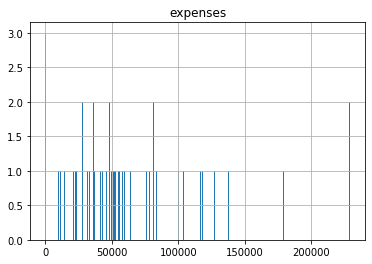

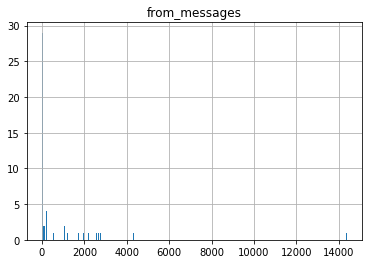

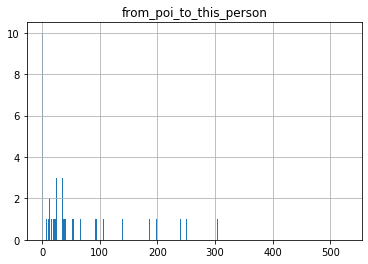

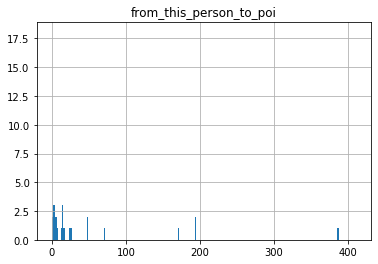

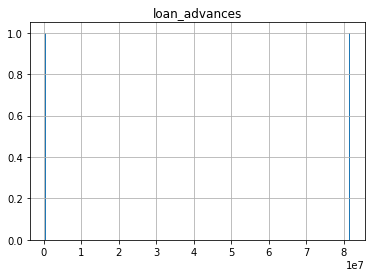

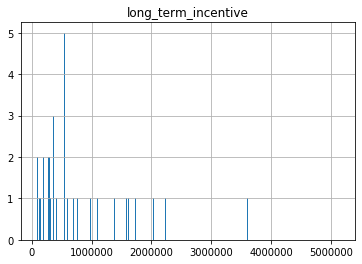

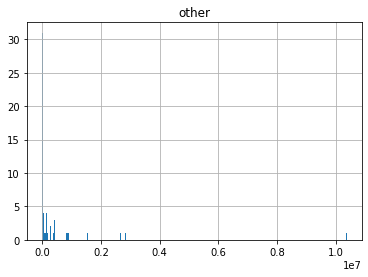

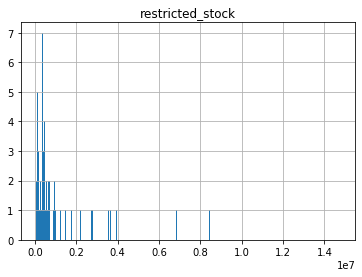

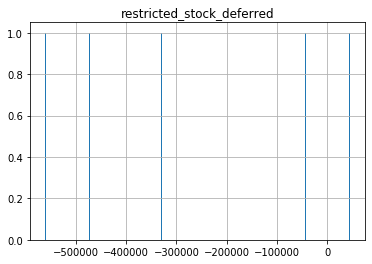

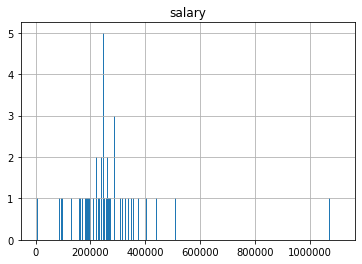

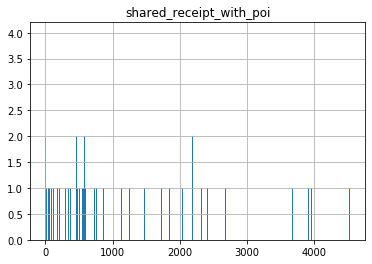

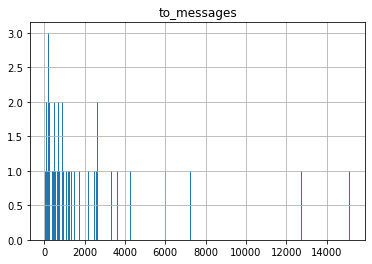

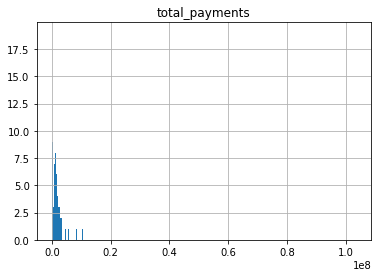

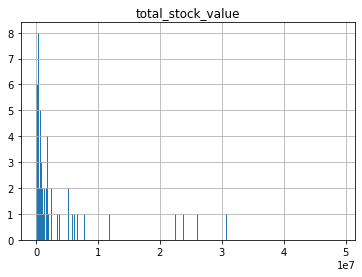

In [22]:
for i in float_features:
    df_train[~df_train[i].isnull()][i].hist(bins = 500)
    plt.title(i)
    plt.show()

## 新增量的特徵

In [16]:
#創造變數股票總值占薪水的比例
df_train['stock_salary_rate'] = df_train['total_stock_value']/df_train['salary']
df_train['stock_salary_rate'].isnull().sum()

43

In [17]:
#test也添加
df_test['stock_salary_rate'] = df_test['total_stock_value']/df_test['salary']

In [18]:
#創造變數bonus佔total payment的比例
df_train['bonus_payment_rate'] = df_train['bonus']/df_train['total_payments']

In [19]:
#test也添加
df_test['bonus_payment_rate'] = df_test['bonus']/df_test['total_payments']

In [20]:
#創造變數deferal income佔total payment的比例
df_train['defincome_payment_rate'] = df_train['deferral_payments']/df_train['total_payments']

In [21]:
df_test['defincome_payment_rate'] = df_test['deferral_payments']/df_test['total_payments']

In [22]:
#創造變數expenses佔total payment的比例
df_train['expenses_payment_rate'] = df_train['expenses']/df_train['total_payments']

In [23]:
df_test['expenses_payment_rate'] = df_test['expenses']/df_test['total_payments']

In [24]:
#創造變數exercised_stock_options佔total payment的比例
df_train['exercised_stock_payments'] = df_train['exercised_stock_options']/df_train['total_payments']

In [25]:
df_test['exercised_stock_payments'] = df_test['exercised_stock_options']/df_test['total_payments']

In [26]:
#創造變數restricted_stock_deferred佔total payment的比例
df_train['restricted_stock_payments'] = df_train['restricted_stock_deferred']/df_train['total_payments']

In [27]:
df_test['restricted_stock_payments'] = df_test['restricted_stock_deferred']/df_test['total_payments']

In [28]:
#創造變數other佔total payment的比例
df_train['other_payments'] = df_train['other']/df_train['total_payments']

In [29]:
df_test['other_payments'] = df_test['other']/df_test['total_payments']

In [30]:
#創造變數接收嫌疑人信息的比例
df_train['proportion_from_poi'] = df_train['from_poi_to_this_person']/df_train['to_messages']

In [31]:
df_test['proportion_from_poi'] = df_test['from_poi_to_this_person']/df_test['to_messages']

In [32]:
#創造變數寄出信息到嫌疑人的比例
df_train['proportion_to_poi'] = df_train['from_this_person_to_poi']/df_train['from_messages']

In [33]:
df_test['proportion_to_poi'] = df_test['from_this_person_to_poi']/df_test['from_messages']

## 離群值處理

In [41]:
#處理離群值bonus
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['bonus'].isnull()]['bonus'], q = i) for i in five_num]
print(quantile_5s)

[70000.0, 450000.0, 750000.0, 1000000.0, 8000000.0]


In [42]:
# 試著將 max 取代為 q99
df_train[df_train['bonus'] == df_train['bonus'].max()] = np.percentile(df_train[~df_train['bonus'].isnull()]['bonus'], q = 90)

In [43]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['bonus'].isnull()]['bonus'], q = i) for i in five_num]
print(quantile_5s)

[70000.0, 450000.0, 750000.0, 1000000.0, 7000000.0]


In [44]:
#處理from message離群值
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['from_messages'].isnull()]['from_messages'], q = i) for i in five_num]
print(quantile_5s)

[12.0, 19.0, 45.0, 215.0, 2000000.0]


In [45]:
df_train[df_train['from_messages'] == df_train['from_messages'].max()] = np.percentile(df_train[~df_train['from_messages'].isnull()]['from_messages'], q = 90)

In [46]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['from_messages'].isnull()]['from_messages'], q = i) for i in five_num]
print(quantile_5s)

[12.0, 19.0, 45.0, 215.0, 14368.0]


In [47]:
#處理other離群值
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['other'].isnull()]['other'], q = i) for i in five_num]
print(quantile_5s)

[2.0, 972.0, 52382.0, 362096.0, 10359729.0]


In [48]:
df_train[df_train['other'] == df_train['other'].max()] = np.percentile(df_train[~df_train['other'].isnull()]['other'], q = 80)

In [49]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['other'].isnull()]['other'], q = i) for i in five_num]
print(quantile_5s)

[2.0, 972.0, 52382.0, 362096.0, 2818454.0]


In [50]:
#處理total_payment離群值
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['total_payments'].isnull()]['total_payments'], q = i) for i in five_num]
print(quantile_5s)

[148.0, 244504.25, 1095881.5, 1869760.0, 8682716.0]


In [51]:
df_train[df_train['total_payments'] == df_train['total_payments'].max()] = np.percentile(df_train[~df_train['total_payments'].isnull()]['total_payments'], q = 80)

In [52]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(df_train[~df_train['total_payments'].isnull()]['total_payments'], q = i) for i in five_num]
print(quantile_5s)

[148.0, 244504.25, 1095881.5, 1869760.0, 8407016.0]


In [34]:
# 削減文字型欄位, 只剩數值型欄位
float_features.append('stock_salary_rate')
float_features.append('bonus_payment_rate')
float_features.append('defincome_payment_rate')
float_features.append('expenses_payment_rate')
float_features.append('exercised_stock_payments')
float_features.append('restricted_stock_payments')
float_features.append('other_payments')
float_features.append('proportion_from_poi')
float_features.append('proportion_to_poi')

In [54]:
df_float = df_train[float_features]
train_num = train_Y.shape[0]
df_float.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,total_stock_value,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments,proportion_from_poi,proportion_to_poi
0,1750000.000000,nan,-3504386.000000,nan,19794175.000000,46950.000000,18.000000,42.000000,4.000000,nan,...,22542539.000000,53.591559,3.465003,nan,0.092961,39.192506,nan,0.346182,0.046409,0.222222
1,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,...,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000,2093263.000000
2,200000.000000,nan,-4167.000000,nan,1624396.000000,22884.000000,39.000000,13.000000,14.000000,nan,...,2493616.000000,11.771001,0.099806,nan,0.011420,0.810623,nan,0.785137,0.057778,0.358974
3,800000.000000,nan,nan,nan,nan,118134.000000,nan,nan,nan,nan,...,985032.000000,4.391485,0.301590,nan,0.044535,nan,nan,0.342116,nan,nan
4,1250000.000000,nan,-262500.000000,nan,nan,35818.000000,144.000000,199.000000,25.000000,nan,...,126027.000000,0.524699,0.762522,nan,0.021850,nan,nan,0.000296,0.076597,0.173611


## 缺失值處理

In [55]:
#處理缺失值
df_mn = df_float.fillna(df_train.mean())
train_X = df_mn[:train_num]
estimator = RandomForestClassifier()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

0.8849802371541502

In [56]:
# 空值補 -1, 搭配最大最小化
df_1 = df_float.fillna(-1)
df_temp = MinMaxScaler().fit_transform(df_1)
train_X = df_temp[:train_num]
estimator = RandomForestClassifier()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

0.8849802371541502

In [64]:
# 空值補中位數, 搭配標準化
df_mn = df_float.fillna(df_train.median())
df_temp = StandardScaler().fit_transform(df_mn)
train_X = df_temp[:train_num]
estimator = RandomForestClassifier()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

0.8940711462450592

In [65]:
# 空值補平均數,搭配標準化
df_mn = df_float.fillna(df_train.mean())
df_temp = StandardScaler().fit_transform(df_mn)
train_X = df_temp[:train_num]
estimator = RandomForestClassifier()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

0.9031620553359684

In [66]:
#空值補mean搭配標準化，效果最好
df_mn = df_float.fillna(df_train.mean())
scaler = StandardScaler()
scaler.fit(df_mn)
df_temp = scaler.transform(df_mn)

In [67]:
#把test data沿用train data特徵
df_test_1 = df_test[float_features].fillna(df_train.mean())
df_temp_test = scaler.transform(df_test_1)

In [68]:
#把數值特徵放在一個陣列裡，拿來放在數值資料
features = []
for i in df_train.columns:
    features.append(i)
features.remove('name')
features.remove('email_address')
features

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'stock_salary_rate',
 'bonus_payment_rate',
 'defincome_payment_rate',
 'expenses_payment_rate',
 'exercised_stock_payments',
 'restricted_stock_payments',
 'other_payments',
 'proportion_from_poi',
 'proportion_to_poi']

In [69]:
df_temp = pd.DataFrame(df_temp)
df_temp.columns=features

In [70]:
df_temp_test = pd.DataFrame(df_temp_test)
df_temp_test.columns=features

In [71]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy = 'quantile').fit(np.array(df_temp['loan_advances']).reshape(-1,1))
est = est.transform(np.array(df_temp['loan_advances']).reshape(-1,1))
est

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [72]:
df_temp.insert(19, 'bins_loan_advances', est)
df_temp.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,bins_loan_advances,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments,proportion_from_poi,proportion_to_poi
0,1.682337,-0.000000,-6.239159,0.000000,4.629491,-0.182343,-0.197339,-0.194053,-0.194139,0.000000,...,1.000000,-0.180597,-0.206842,-0.000000,-0.172526,-0.185190,-0.000000,-0.182628,-0.193989,-0.193989
1,2.324527,3.203385,4.864350,10.122769,-0.055492,10.204065,10.353043,10.352877,10.352861,9.013728,...,1.000000,10.358682,10.347462,10.256859,10.361812,10.356457,9.893495,10.357585,10.352836,10.352836
2,-1.217463,-0.000000,0.703883,0.000000,-0.179589,-0.304494,-0.197233,-0.194199,-0.194089,0.000000,...,1.000000,-0.180808,-0.206859,-0.000000,-0.172526,-0.185383,-0.000000,-0.182626,-0.193989,-0.193988
3,-0.094960,-0.000000,0.000000,0.000000,0.000000,0.178964,0.000000,-0.000000,0.000000,0.000000,...,1.000000,-0.180845,-0.206858,-0.000000,-0.172526,0.000000,-0.000000,-0.182628,0.000000,0.000000
4,0.746918,-0.000000,0.191453,0.000000,0.000000,-0.238845,-0.196704,-0.193262,-0.194034,0.000000,...,1.000000,-0.180865,-0.206856,-0.000000,-0.172526,0.000000,-0.000000,-0.182630,-0.193989,-0.193989


In [73]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy = 'quantile').fit(np.array(df_temp['loan_advances']).reshape(-1,1))
est = est.transform(np.array(df_temp_test['loan_advances']).reshape(-1,1))

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [74]:
df_temp_test.insert(19, 'bins_loan_advances', est)
df_temp_test

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,bins_loan_advances,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments,proportion_from_poi,proportion_to_poi
0,8.230273,3.317513,-3.918439,0.000000,-0.357254,-0.332557,-0.194991,-0.193116,-0.193615,0.000000,...,1.000000,-0.180841,-0.206855,-0.425720,-0.172527,-0.185387,-0.000000,-0.182630,-0.193989,-0.193989
1,0.934002,-0.000000,0.710496,0.000000,0.000000,-0.086123,-0.197294,-0.193559,-0.194084,0.000000,...,1.000000,-0.180863,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182630,-0.193989,-0.193987
2,1.214628,-0.000000,-5.470761,0.000000,0.856243,-0.247875,-0.197269,-0.194103,-0.194054,0.000000,...,1.000000,-0.180735,-0.206833,-0.000000,-0.172526,-0.185291,-0.000000,-0.182630,-0.193989,-0.193987
3,4.020886,-0.000000,0.000000,0.000000,-0.003126,0.016745,-0.181962,-0.193932,-0.191091,0.000000,...,1.000000,-0.180817,-0.206856,-0.000000,-0.172526,-0.185385,-0.000000,-0.182630,-0.193989,-0.193989
4,0.279208,-0.000000,0.246002,0.000000,0.000000,-0.264954,-0.197183,-0.193972,-0.194099,0.000000,...,1.000000,-0.180837,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182629,-0.193989,-0.193989
5,1.588795,-0.000000,0.000000,0.000000,0.000000,0.081079,-0.197294,-0.194063,-0.194155,0.000000,...,1.000000,-0.180857,-0.206855,-0.000000,-0.172526,0.000000,-0.000000,-0.182630,-0.193989,-0.193990
6,2.150047,12.949217,-5.966661,0.000000,2.151962,0.020872,-0.197324,-0.193045,-0.194129,8.399044,...,1.000000,-0.180798,-0.206859,-0.425720,-0.172527,-0.185384,-0.000000,-0.182628,-0.193989,-0.193989
7,0.000000,-0.000000,0.516201,-0.707345,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
8,-0.094960,-0.000000,0.117068,0.000000,-0.406806,0.067979,-0.197319,-0.193317,-0.194104,0.000000,...,1.000000,-0.180848,-0.206855,-0.000000,-0.172526,-0.185383,-0.000000,-0.182630,-0.193988,-0.193988
9,-1.404547,-1.388505,0.315428,0.000000,0.491699,-0.377964,0.000000,-0.000000,0.000000,0.000000,...,1.000000,-0.180589,-0.206858,-0.425722,-0.172526,-0.185334,-1.343438,-0.182627,0.000000,0.000000


In [58]:
est = preprocessing.KBinsDiscretizer(n_bins=50, encode='ordinal', strategy = 'quantile').fit(np.array(df_temp['other']).reshape(-1,1))
est = est.transform(np.array(df_temp['other']).reshape(-1,1))
est

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[19.],
       [30.],
       [29.],
       [27.],
       [ 3.],
       [12.],
       [17.],
       [16.],
       [24.],
       [20.],
       [18.],
       [10.],
       [20.],
       [26.],
       [ 0.],
       [ 1.],
       [16.],
       [22.],
       [ 5.],
       [12.],
       [25.],
       [ 1.],
       [ 8.],
       [22.],
       [22.],
       [22.],
       [16.],
       [22.],
       [ 6.],
       [12.],
       [22.],
       [26.],
       [ 9.],
       [10.],
       [13.],
       [22.],
       [ 2.],
       [22.],
       [22.],
       [22.],
       [ 6.],
       [22.],
       [30.],
       [22.],
       [26.],
       [13.],
       [18.],
       [21.],
       [15.],
       [ 7.],
       [22.],
       [15.],
       [ 4.],
       [19.],
       [17.],
       [22.],
       [22.],
       [ 6.],
       [30.],
       [23.],
       [22.],
       [22.],
       [22.],
       [ 4.],
       [22.],
       [22.],
       [ 9.],
       [25.],
       [14.],
       [ 0.],
       [22.],
      

In [59]:
df_temp.insert(19, 'bins_other', est)
df_temp.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,total_stock_value,bins_other,bins_loan_advances,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments
0,1.682337,-0.000000,-6.239159,0.000000,4.629491,-0.182343,-0.197339,-0.194053,-0.194139,0.000000,...,4.318926,19.000000,1.000000,-0.180597,-0.206842,-0.000000,-0.172526,-0.185190,-0.000000,-0.182628
1,2.324527,3.203385,4.864350,10.122769,-0.055492,10.204065,10.353043,10.352877,10.352861,9.013728,...,-0.139378,30.000000,1.000000,10.358682,10.347462,10.256859,10.361812,10.356457,9.893495,10.357585
2,-1.217463,-0.000000,0.703883,0.000000,-0.179589,-0.304494,-0.197233,-0.194199,-0.194089,0.000000,...,-0.052094,29.000000,1.000000,-0.180808,-0.206859,-0.000000,-0.172526,-0.185383,-0.000000,-0.182626
3,-0.094960,-0.000000,0.000000,0.000000,0.000000,0.178964,0.000000,-0.000000,0.000000,0.000000,...,-0.380992,27.000000,1.000000,-0.180845,-0.206858,-0.000000,-0.172526,0.000000,-0.000000,-0.182628
4,0.746918,-0.000000,0.191453,0.000000,0.000000,-0.238845,-0.196704,-0.193262,-0.194034,0.000000,...,-0.568271,3.000000,1.000000,-0.180865,-0.206856,-0.000000,-0.172526,0.000000,-0.000000,-0.182630


In [60]:
est = preprocessing.KBinsDiscretizer(n_bins=50, encode='ordinal', strategy = 'quantile').fit(np.array(df_temp['other']).reshape(-1,1))
est = est.transform(np.array(df_temp_test['other']).reshape(-1,1))
est

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[20.],
       [ 9.],
       [13.],
       [ 9.],
       [21.],
       [10.],
       [30.],
       [22.],
       [ 6.],
       [20.],
       [22.],
       [22.],
       [22.],
       [22.],
       [13.],
       [22.],
       [ 7.],
       [26.],
       [ 0.],
       [22.],
       [30.],
       [24.],
       [10.],
       [19.],
       [ 9.],
       [ 4.],
       [17.],
       [22.],
       [25.],
       [29.],
       [22.],
       [11.],
       [21.]])

In [61]:
df_temp_test.insert(19, 'bins_other', est)
df_temp_test.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,total_stock_value,bins_other,bins_loan_advances,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments
0,8.230273,3.317513,-3.918439,0.000000,-0.357254,-0.332557,-0.194991,-0.193116,-0.193615,0.000000,...,-0.353593,20.000000,1.000000,-0.180841,-0.206855,-0.425720,-0.172527,-0.185387,-0.000000,-0.182630
1,0.934002,-0.000000,0.710496,0.000000,0.000000,-0.086123,-0.197294,-0.193559,-0.194084,0.000000,...,-0.540794,9.000000,1.000000,-0.180863,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182630
2,1.214628,-0.000000,-5.470761,0.000000,0.856243,-0.247875,-0.197269,-0.194103,-0.194054,0.000000,...,0.797619,13.000000,1.000000,-0.180735,-0.206833,-0.000000,-0.172526,-0.185291,-0.000000,-0.182630
3,4.020886,-0.000000,0.000000,0.000000,-0.003126,0.016745,-0.181962,-0.193932,-0.191091,0.000000,...,0.192226,9.000000,1.000000,-0.180817,-0.206856,-0.000000,-0.172526,-0.185385,-0.000000,-0.182630
4,0.279208,-0.000000,0.246002,0.000000,0.000000,-0.264954,-0.197183,-0.193972,-0.194099,0.000000,...,-0.050253,21.000000,1.000000,-0.180837,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182629


In [62]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy = 'quantile').fit(np.array(df_temp['restricted_stock_deferred']).reshape(-1,1))
est = est.transform(np.array(df_temp['restricted_stock_deferred']).reshape(-1,1))
est

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [63]:
df_temp.insert(19, 'bins_restricted_stock_deferred', est)
df_temp.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,bins_restricted_stock_deferred,bins_deferred_income,bins_loan_advances,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments
0,1.682337,-0.000000,-6.239159,0.000000,4.629491,-0.182343,-0.197339,-0.194053,-0.194139,0.000000,...,1.000000,0.000000,1.000000,-0.180597,-0.206842,-0.000000,-0.172526,-0.185190,-0.000000,-0.182628
1,2.324527,3.203385,4.864350,10.122769,-0.055492,10.204065,10.353043,10.352877,10.352861,9.013728,...,1.000000,3.000000,1.000000,10.358682,10.347462,10.256859,10.361812,10.356457,9.893495,10.357585
2,-1.217463,-0.000000,0.703883,0.000000,-0.179589,-0.304494,-0.197233,-0.194199,-0.194089,0.000000,...,1.000000,3.000000,1.000000,-0.180808,-0.206859,-0.000000,-0.172526,-0.185383,-0.000000,-0.182626
3,-0.094960,-0.000000,0.000000,0.000000,0.000000,0.178964,0.000000,-0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,-0.180845,-0.206858,-0.000000,-0.172526,0.000000,-0.000000,-0.182628
4,0.746918,-0.000000,0.191453,0.000000,0.000000,-0.238845,-0.196704,-0.193262,-0.194034,0.000000,...,1.000000,1.000000,1.000000,-0.180865,-0.206856,-0.000000,-0.172526,0.000000,-0.000000,-0.182630


In [64]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy = 'quantile').fit(np.array(df_temp['restricted_stock_deferred']).reshape(-1,1))
est = est.transform(np.array(df_temp_test['restricted_stock_deferred']).reshape(-1,1))
est

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [65]:
df_temp_test.insert(19, 'bins_restricted_stock_deferred', est)
df_temp_test

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,bins_restricted_stock_deferred,bins_deferred_income,bins_loan_advances,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments
0,8.230273,3.317513,-3.918439,0.000000,-0.357254,-0.332557,-0.194991,-0.193116,-0.193615,0.000000,...,1.000000,0.000000,1.000000,-0.180841,-0.206855,-0.425720,-0.172527,-0.185387,-0.000000,-0.182630
1,0.934002,-0.000000,0.710496,0.000000,0.000000,-0.086123,-0.197294,-0.193559,-0.194084,0.000000,...,1.000000,3.000000,1.000000,-0.180863,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182630
2,1.214628,-0.000000,-5.470761,0.000000,0.856243,-0.247875,-0.197269,-0.194103,-0.194054,0.000000,...,1.000000,0.000000,1.000000,-0.180735,-0.206833,-0.000000,-0.172526,-0.185291,-0.000000,-0.182630
3,4.020886,-0.000000,0.000000,0.000000,-0.003126,0.016745,-0.181962,-0.193932,-0.191091,0.000000,...,1.000000,1.000000,1.000000,-0.180817,-0.206856,-0.000000,-0.172526,-0.185385,-0.000000,-0.182630
4,0.279208,-0.000000,0.246002,0.000000,0.000000,-0.264954,-0.197183,-0.193972,-0.194099,0.000000,...,1.000000,1.000000,1.000000,-0.180837,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182629
5,1.588795,-0.000000,0.000000,0.000000,0.000000,0.081079,-0.197294,-0.194063,-0.194155,0.000000,...,1.000000,1.000000,1.000000,-0.180857,-0.206855,-0.000000,-0.172526,0.000000,-0.000000,-0.182630
6,2.150047,12.949217,-5.966661,0.000000,2.151962,0.020872,-0.197324,-0.193045,-0.194129,8.399044,...,1.000000,0.000000,1.000000,-0.180798,-0.206859,-0.425720,-0.172527,-0.185384,-0.000000,-0.182628
7,0.000000,-0.000000,0.516201,-0.707345,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000
8,-0.094960,-0.000000,0.117068,0.000000,-0.406806,0.067979,-0.197319,-0.193317,-0.194104,0.000000,...,1.000000,1.000000,1.000000,-0.180848,-0.206855,-0.000000,-0.172526,-0.185383,-0.000000,-0.182630
9,-1.404547,-1.388505,0.315428,0.000000,0.491699,-0.377964,0.000000,-0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,-0.180589,-0.206858,-0.425722,-0.172526,-0.185334,-1.343438,-0.182627


In [58]:
# Ignore NA, 計算五值
max_outlier_features = []
min_outlier_features = []
five_num = [0, 25, 50, 75, 100]
for c in float_features:
    quantile_5s = [np.percentile(df_temp[c], q = i) for i in five_num]
    print(f'{c}:{quantile_5s}')
    #把需要調整的欄位挑出來
    if quantile_5s[4] > 6:
        max_outlier_features.append(c)
    elif quantile_5s[0] < -6:
        min_outlier_features.append(c)

bonus:[-1.5877147696081815, -0.2820437533562744, 2.1779434605872304e-16, 2.1779434605872304e-16, 6.219122421996383]
deferral_payments:[-1.7345216367823109, -2.617987165714524e-16, -2.617987165714524e-16, -2.617987165714524e-16, 5.1626652791341945]
deferred_income:[-6.239158618049223, 0.0, 0.0, 0.0, 4.864349504230405]
director_fees:[-1.232378984861316, 3.160702876375919e-16, 3.160702876375919e-16, 3.160702876375919e-16, 10.122768543804684]
exercised_stock_options:[-0.6089713266565111, -0.4530365048887415, -0.1762439820729313, 0.0, 7.53347207867902]
expenses:[-0.41989422453016384, -0.2776942835734566, -0.02485491111424001, 0.0, 10.204064563862119]
from_messages:[-0.19736957733007943, -0.1972234114053573, -0.1868788960984709, 0.0, 10.353043115446805]
from_poi_to_this_person:[-0.19426439589953018, -0.19414346919404518, -0.1933272139320216, -3.6660732647146685e-17, 10.352877200083602]
from_this_person_to_poi:[-0.1941595386315851, -0.19413434585659117, -0.1937413385666857, 1.0998093782373883

In [67]:
for c in max_outlier_features:
    df_temp[df_temp[c] == df_temp[c].max()] = np.percentile(df_temp[c], q = 90)

In [68]:
for c in min_outlier_features:
    df_temp[df_temp[c] == df_temp[c].min()] = np.percentile(df_temp[c], q = 10)

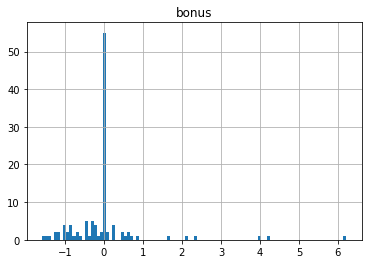

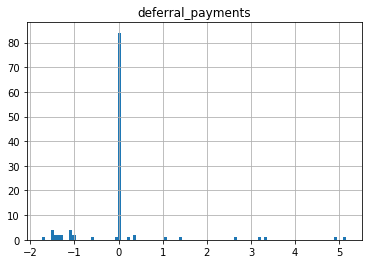

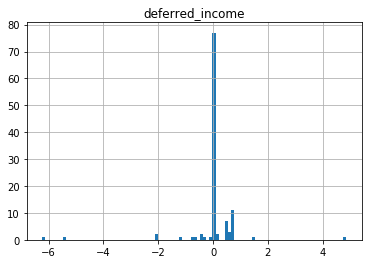

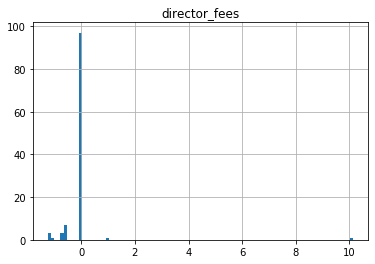

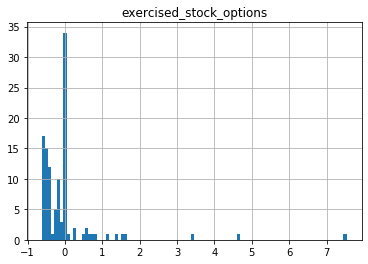

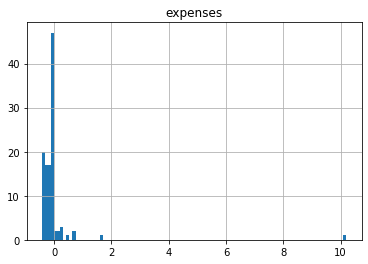

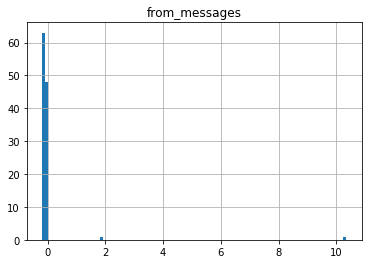

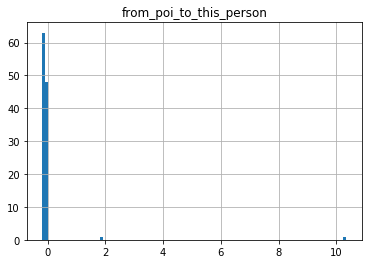

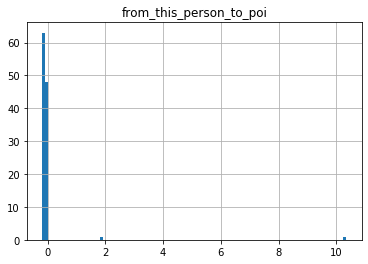

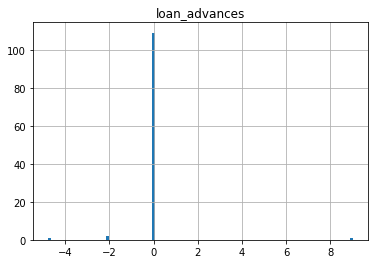

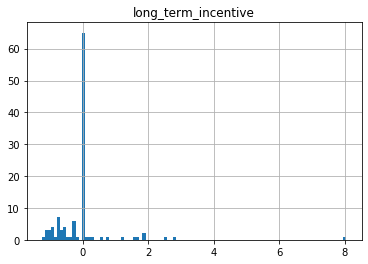

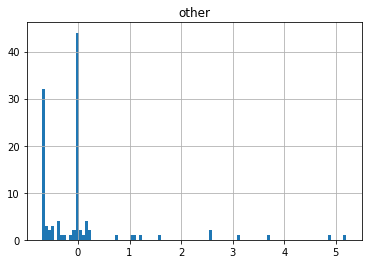

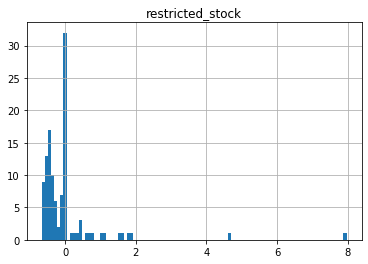

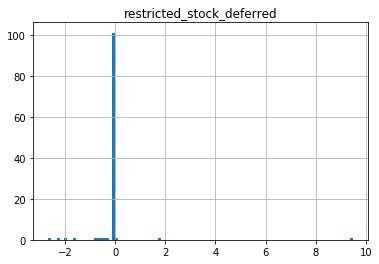

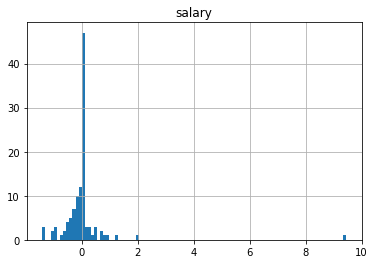

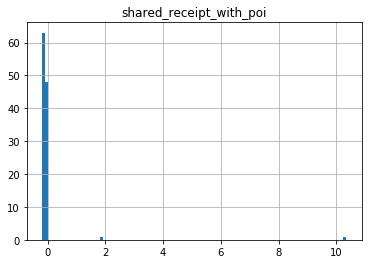

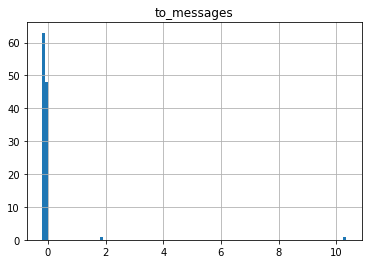

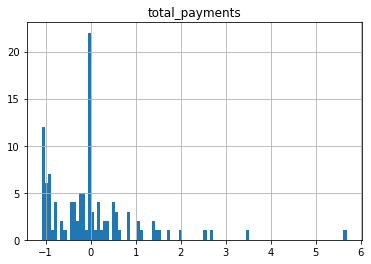

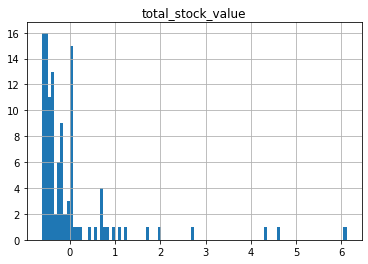

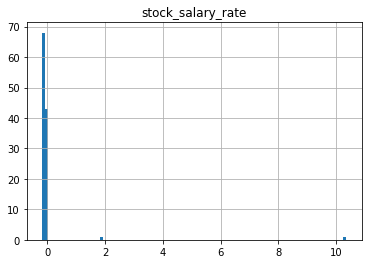

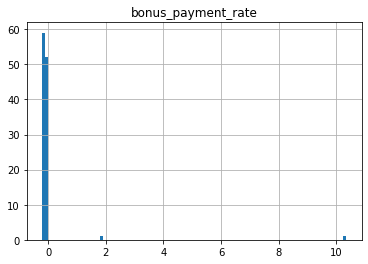

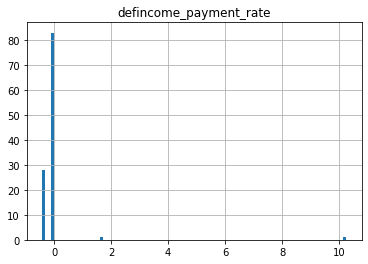

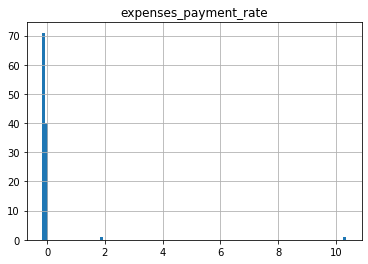

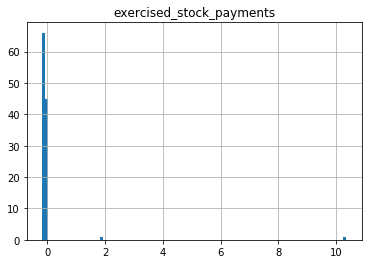

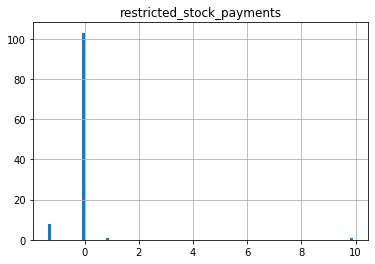

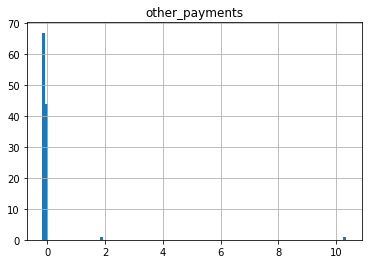

In [66]:
for i in float_features:
    df_temp[~df_temp[i].isnull()][i].hist(bins = 100)
    plt.title(i)
    plt.show()

In [75]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_temp):
    data_na = (df_temp.isnull().sum() / len(df_temp)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df_temp)

,Missing Ratio


## 處理類別資料

In [76]:
#處理類別資料
df_all_category = pd.concat([df_test, df_train])

In [77]:
df_all_category.shape

(146, 30)

In [78]:
df_count = df_all_category.groupby(['name'])['email_address'].agg({'email_address':'size'}).reset_index()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [79]:
#從index數量可以看出每個e-mail都不一樣
df_count

,name,email_address
0,2093.400000,1
1,407254.400000,1
2,2093263.000000,1
3,ALLEN PHILLIP K,1
4,BADUM JAMES P,1
...,...,...
141,WINOKUR JR. HERBERT S,1
142,WODRASKA JOHN,1
143,WROBEL BRUCE,1
144,YEAGER F SCOTT,1


In [80]:
null_index = df_train[df_train['email_address'].isnull().values == True].index

In [81]:
for i in null_index:
    df_train['email_address'][i] = 0

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
df_train['email_address'].isnull().sum()

0

In [83]:
for i in range(len(df_train['email_address'])):
    if df_train['email_address'][i] != 0:
        df_train['email_address'][i] = 1

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
#處理test類別資料
null_index = df_test[df_test['email_address'].isnull().values == True].index
for c in null_index:
    df_test['email_address'][c] = 0
for i in range(len(df_test['email_address'])):
    if df_test['email_address'][i] != 0:
        df_test['email_address'][i] = 1

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# 卡方檢定

In [85]:
cr=pd.crosstab(df_train['email_address'], df['poi'], margins=False)

In [86]:
cr.values

array([[30,  0],
       [70, 13]], dtype=int64)

In [87]:
import scipy.stats as stats
cr=pd.crosstab(df_train['email_address'], df['poi'], margins=False)
cr
sr=stats.chi2_contingency(cr.values)
sr
result_cr = pd.DataFrame(sr[0:2],index=['chi','p'],columns=['cr'])
result_cr

,cr
chi,3.882643
p,0.048788


In [88]:
result_cr.to_csv('chi_email_mlmidterm.csv')

In [89]:
bin_tab=pd.crosstab(df_temp['bins_loan_advances'], df['poi'], margins=False)
sr=stats.chi2_contingency(bin_tab.values)
result_cr = pd.DataFrame(sr[0:2],index=['chi','p'],columns=['cr'])
result_cr

,cr
chi,0.080667
p,0.776395


In [90]:
result_cr.to_csv('chi_loan_mlmidtrem.csv')

In [91]:
#處理類別資料
#from sklearn.preprocessing import LabelEncoder
#df = pd.get_dummies(df, columns = ["email_address"], prefix="email")
#df.drop(labels = ["name"], axis = 1, inplace = True)

In [92]:
high_name.append('email_address')
#high_name.append('bins_restricted_stock_deferred')

In [93]:
features.append('email_address')
#features.append('bins_other')
df_test[features] = df_temp_test

In [94]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 30 columns):
name                         33 non-null object
bonus                        33 non-null float64
deferral_payments            33 non-null float64
deferred_income              33 non-null float64
director_fees                33 non-null float64
email_address                33 non-null float64
exercised_stock_options      33 non-null float64
expenses                     33 non-null float64
from_messages                33 non-null float64
from_poi_to_this_person      33 non-null float64
from_this_person_to_poi      33 non-null float64
loan_advances                33 non-null float64
long_term_incentive          33 non-null float64
other                        33 non-null float64
restricted_stock             33 non-null float64
restricted_stock_deferred    33 non-null float64
salary                       33 non-null float64
shared_receipt_with_poi      33 non-null float64
to_messages     

In [95]:
float_features.append('email_address')
#float_features.append('bins_other')
df_train[float_features] = df_temp

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 30 columns):
name                         113 non-null object
bonus                        113 non-null float64
deferral_payments            113 non-null float64
deferred_income              113 non-null float64
director_fees                113 non-null float64
email_address                113 non-null float64
exercised_stock_options      113 non-null float64
expenses                     113 non-null float64
from_messages                113 non-null float64
from_poi_to_this_person      113 non-null float64
from_this_person_to_poi      113 non-null float64
loan_advances                113 non-null float64
long_term_incentive          113 non-null float64
other                        113 non-null float64
restricted_stock             113 non-null float64
restricted_stock_deferred    113 non-null float64
salary                       113 non-null float64
shared_receipt_with_poi      113 non-null floa

In [97]:
df_test.shape

(33, 30)

In [98]:
df_test

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,total_stock_value,stock_salary_rate,bonus_payment_rate,defincome_payment_rate,expenses_payment_rate,exercised_stock_payments,restricted_stock_payments,other_payments,proportion_from_poi,proportion_to_poi
0,BELDEN TIMOTHY N,8.230273,3.317513,-3.918439,0.000000,-0.193989,-0.357254,-0.332557,-0.194991,-0.193116,...,-0.353593,1.000000,-0.180841,-0.206855,-0.425720,-0.172527,-0.185387,-0.000000,-0.182630,-0.193989
1,BOWEN JR RAYMOND M,0.934002,-0.000000,0.710496,0.000000,-0.193987,0.000000,-0.086123,-0.197294,-0.193559,...,-0.540794,1.000000,-0.180863,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182630,-0.193989
2,HANNON KEVIN P,1.214628,-0.000000,-5.470761,0.000000,-0.193987,0.856243,-0.247875,-0.197269,-0.194103,...,0.797619,1.000000,-0.180735,-0.206833,-0.000000,-0.172526,-0.185291,-0.000000,-0.182630,-0.193989
3,DELAINEY DAVID W,4.020886,-0.000000,0.000000,0.000000,-0.193989,-0.003126,0.016745,-0.181962,-0.193932,...,0.192226,1.000000,-0.180817,-0.206856,-0.000000,-0.172526,-0.185385,-0.000000,-0.182630,-0.193989
4,CAUSEY RICHARD A,0.279208,-0.000000,0.246002,0.000000,-0.193989,0.000000,-0.264954,-0.197183,-0.193972,...,-0.050253,1.000000,-0.180837,-0.206857,-0.000000,-0.172526,0.000000,-0.000000,-0.182629,-0.193989
5,HICKERSON GARY J,1.588795,-0.000000,0.000000,0.000000,-0.193990,0.000000,0.081079,-0.197294,-0.194063,...,-0.499580,1.000000,-0.180857,-0.206855,-0.000000,-0.172526,0.000000,-0.000000,-0.182630,-0.193989
6,FREVERT MARK A,2.150047,12.949217,-5.966661,0.000000,-0.193989,2.151962,0.020872,-0.197324,-0.193045,...,2.592149,1.000000,-0.180798,-0.206859,-0.425720,-0.172527,-0.185384,-0.000000,-0.182628,-0.193989
7,CHAN RONNIE,0.000000,-0.000000,0.516201,-0.707345,0.000000,0.000000,0.000000,0.000000,-0.000000,...,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
8,DONAHUE JR JEFFREY M,-0.094960,-0.000000,0.117068,0.000000,-0.193988,-0.406806,0.067979,-0.197319,-0.193317,...,-0.360072,1.000000,-0.180848,-0.206855,-0.000000,-0.172526,-0.185383,-0.000000,-0.182630,-0.193988
9,REYNOLDS LAWRENCE,-1.404547,-1.388505,0.315428,0.000000,0.000000,0.491699,-0.377964,0.000000,-0.000000,...,0.324700,1.000000,-0.180589,-0.206858,-0.425722,-0.172526,-0.185334,-1.343438,-0.182627,0.000000


In [99]:
df_train.drop(['name'],axis=1, inplace=True)
df_test.drop(['name'],axis=1 , inplace=True)

In [100]:
train_Y.value_counts()

False    100
True      13
Name: poi, dtype: int64

In [101]:
#high_name.remove('bins_loan_advances')

In [102]:
df_train[high_name]

,bonus,exercised_stock_options,loan_advances,other,restricted_stock,salary,total_payments,total_stock_value,bonus_payment_rate,exercised_stock_payments,proportion_to_poi,email_address
0,1.682337,4.629491,0.000000,-0.331198,1.057654,0.764313,-0.670644,4.318926,-0.180597,-0.172526,-0.193989,-0.193989
1,2.324527,-0.055492,9.013728,3.687028,0.649786,9.460335,0.606176,-0.139378,10.358682,10.361812,10.352836,10.352836
2,-1.217463,-0.179589,0.000000,2.597992,-0.112305,-0.321201,0.534322,-0.052094,-0.180808,-0.172526,-0.193989,-0.193988
3,-0.094960,0.000000,0.000000,1.203398,-0.040200,-0.256416,1.055857,-0.380992,-0.180845,-0.172526,0.000000,0.000000
4,0.746918,0.000000,0.000000,-0.696388,-0.575018,-0.173835,0.241217,-0.568271,-0.180865,-0.172526,-0.193989,-0.193989
...,...,...,...,...,...,...,...,...,...,...,...,...
108,-0.656212,0.000000,0.000000,0.048401,-0.334876,-0.177406,-0.182626,-0.484180,-0.180856,-0.172526,0.000000,0.000000
109,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-1.037047,0.000000,0.000000,-0.172521,-0.193989,-0.193990
110,-1.030379,-0.601903,-2.146331,-0.000000,0.000000,1.982968,0.038137,-0.589468,-0.180867,-0.172526,-0.193990,-0.193990
111,0.000000,0.000000,0.000000,-0.000000,0.727012,0.000000,-1.076290,-0.112336,0.000000,-0.172521,-0.193990,-0.193988


## 挑選模型

In [108]:
x = df_train
y = train_Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(random_state=7)

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = cross_val_score(clf, x_train, y_train, n_jobs = -1 , cv = 10).mean()
auc = roc_auc_score(y_test, y_pred)
print('RandomForest score:',score)

RandomForest score: 0.9208333333333332


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=7)

In [117]:
from sklearn.metrics import roc_auc_score
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
score = cross_val_score(lr, x_train, y_train, n_jobs = -1 , cv = 10).mean()
auc = roc_auc_score(y_test, y_pred)
print('LogisticRegression score:', score)

LogisticRegression score: 0.9208333333333332


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [118]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(random_state=7)

In [119]:
SGD.fit(x_train, y_train)
y_pred = SGD.predict(x_test)
score = cross_val_score(SGD, x_train, y_train, n_jobs = -1 , cv = 10).mean()
auc = roc_auc_score(y_test, y_pred)
print('SGD score:', score)

SGD score: 0.8287698412698411


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [120]:
from sklearn.svm import SVC
SVC = SVC(random_state=7)

In [122]:
SVC.fit(x_train, y_train)
y_pred = SVC.predict(x_test)
score = cross_val_score(SVC, x_train, y_train, n_jobs = -1 , cv = 10).mean()
auc = roc_auc_score(y_test, y_pred)
print('SVC score:', score)

SVC score: 0.9083333333333332


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [123]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=7)

In [125]:
DTC.fit(x_train, y_train)
y_pred = DTC.predict(x_test)
score = cross_val_score(DTC, x_train, y_train, n_jobs = -1 , cv = 10).mean()
auc = roc_auc_score(y_test, y_pred)
print('SVC score:', score)

SVC score: 0.8384920634920634


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [130]:
gdbt = GradientBoostingClassifier()
gdbt.fit(x_train, y_train)
y_pred = gdbt.predict(x_test)
score = cross_val_score(gdbt, x_train, y_train, n_jobs = -1 , cv = 10).mean()
auc = roc_auc_score(y_test, y_pred)
print('gdbt score:', score)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


gdbt score: 0.8668650793650793


## 使用高顯著特徵建模 邏輯斯迴歸

In [151]:
x = df_train[high_name]
y = train_Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced').fit(x_train, y_train)
lr

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [152]:
score = cross_val_score(lr, x_train, y_train, n_jobs = -1 , cv = 10).mean()
print('LogisticRegression adjusting score:',score)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LogisticRegression adjusting score: 0.8482142857142858


In [153]:
pred = lr.predict_proba(df_test[high_name])

# 隨機森林

In [131]:
x = df_train
y = train_Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(random_state=7)

In [133]:
#列出參數
params = {'n_estimators':[100, 200, 300],#使用100棵樹
          'criterion':["entropy", "gini"],
         'max_depth':[x for x in np.arange(2, 13, 4)],
         'min_samples_split' : [2],
        'min_samples_leaf' : [1]
         }

grid_search = GridSearchCV(clf, params, verbose=1)

grid_result = grid_search.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   14.2s finished
D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [134]:
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.916667 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [135]:
# 使用最佳參數重新建立模型
clf_bestparam = RandomForestClassifier(criterion=grid_result.best_params_['criterion'],
                                           max_depth=grid_result.best_params_['max_depth'],
                                           min_samples_leaf=grid_result.best_params_['min_samples_leaf'],
                                           min_samples_split=grid_result.best_params_['min_samples_split'],
                                           n_estimators=grid_result.best_params_['n_estimators']
                                          )

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

In [136]:
print('Accurary:',metrics.accuracy_score(y_pred, y_test))

Accurary: 0.8275862068965517


In [137]:
print("feature_importances_ : \n%s" % (clf_bestparam.feature_importances_))

feature_importances_ : 
[0.03726865 0.01531192 0.04001697 0.00134537 0.03603634 0.08327963
 0.10281574 0.04876106 0.02787919 0.00886854 0.00271611 0.0139689
 0.07386581 0.0380959  0.0089075  0.05225576 0.00731158 0.01983484
 0.04357955 0.08339781 0.00163516 0.03340242 0.03197535 0.02894101
 0.02899237 0.04683893 0.0100284  0.06357193 0.00909725]


In [138]:
feature = df_train.columns
importance = clf_bestparam.feature_importances_

In [139]:
feature[importance>0.04]

Index(['deferred_income', 'exercised_stock_options', 'expenses',
       'from_messages', 'other', 'salary', 'total_payments',
       'total_stock_value', 'restricted_stock_payments',
       'proportion_from_poi'],
      dtype='object')

In [140]:
x = df_train[feature[importance>0.04]]
y = train_Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(random_state=7)

In [141]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = cross_val_score(clf, x_train, y_train, n_jobs = -1 , cv = 10).mean()
print('Before adjusting score:',score)

Before adjusting score: 0.9097222222222221


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [142]:
score_auc = metrics.roc_auc_score(y_pred, y_test)
score_auc

0.9285714285714286

In [143]:
#列出參數
params = {'n_estimators':[100, 200, 300],#使用100棵樹
          'criterion':["entropy", "gini"],
         'max_depth':[x for x in np.arange(2, 13, 4)],
         'min_samples_split' : [2],
        'min_samples_leaf' : [1]
         }

grid_search = GridSearchCV(clf, params, verbose=1)

grid_result = grid_search.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   14.5s finished
D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [144]:
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.916667 using {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [145]:
# 使用最佳參數重新建立模型
clf_bestparam = RandomForestClassifier(criterion=grid_result.best_params_['criterion'],
                                           max_depth=grid_result.best_params_['max_depth'],
                                           min_samples_leaf=grid_result.best_params_['min_samples_leaf'],
                                           min_samples_split=grid_result.best_params_['min_samples_split'],
                                           n_estimators=grid_result.best_params_['n_estimators']
                                          )

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

In [146]:
print('Accurary:',metrics.accuracy_score(y_pred, y_test))

Accurary: 0.8275862068965517


In [147]:
#score_auc = metrics.roc_auc_score(y_pred, y_test)
#score_auc

In [148]:
print("Feature importance: ", clf_bestparam.feature_importances_)

Feature importance:  [0.10274437 0.1203565  0.15515151 0.07396954 0.08232097 0.12191316
 0.04593088 0.15372759 0.07733481 0.06655067]


In [149]:
pred = clf_bestparam.predict_proba(df_test[feature[importance>0.04]])

In [154]:
pred

array([[8.37271349e-01, 1.62728651e-01],
       [6.69151099e-01, 3.30848901e-01],
       [5.86963281e-01, 4.13036719e-01],
       [7.37861862e-01, 2.62138138e-01],
       [6.20039403e-01, 3.79960597e-01],
       [6.88404027e-01, 3.11595973e-01],
       [1.51634728e-01, 8.48365272e-01],
       [5.71556475e-01, 4.28443525e-01],
       [6.53103676e-01, 3.46896324e-01],
       [5.20580730e-01, 4.79419270e-01],
       [5.32707148e-01, 4.67292852e-01],
       [6.28520528e-01, 3.71479472e-01],
       [6.08286294e-01, 3.91713706e-01],
       [5.79705759e-01, 4.20294241e-01],
       [4.71487316e-01, 5.28512684e-01],
       [6.03105800e-01, 3.96894200e-01],
       [5.99798421e-01, 4.00201579e-01],
       [5.93276274e-01, 4.06723726e-01],
       [6.02254662e-01, 3.97745338e-01],
       [6.03142307e-01, 3.96857693e-01],
       [1.00000000e+00, 2.01515399e-11],
       [7.12918241e-01, 2.87081759e-01],
       [6.20042939e-01, 3.79957061e-01],
       [5.87473605e-01, 4.12526395e-01],
       [5.952163

In [113]:
pred = pred[:,0]

In [114]:
len(pred)

33

In [115]:
result = pd.DataFrame(pred)

In [116]:
df_test_org = pd.read_csv(data_path+'test_features.csv')

In [117]:
result.insert(0,'name',df_test_org['name'])

In [118]:
result.columns = ['name', 'poi']

In [119]:
result

,name,poi
0,BELDEN TIMOTHY N,0.837271
1,BOWEN JR RAYMOND M,0.669151
2,HANNON KEVIN P,0.586963
3,DELAINEY DAVID W,0.737862
4,CAUSEY RICHARD A,0.620039
5,HICKERSON GARY J,0.688404
6,FREVERT MARK A,0.151635
7,CHAN RONNIE,0.571556
8,DONAHUE JR JEFFREY M,0.653104
9,REYNOLDS LAWRENCE,0.520581


In [120]:
result.to_csv('D:\\ML\\kaggle期中考\\submission_logistic_cv.csv')